In [ ]:
key = input("Enter your key")

In [ ]:
import requests

In [ ]:
limit = input("enter max results")
videoId = input("enter video id")
googleApi = 'https://www.googleapis.com/youtube/v3/commentThreads?part=snippet&maxResults='+limit+'&videoId='+videoId+'&key='+key


In [ ]:
googleApi

In [155]:
page_info = requests.get(googleApi)

In [156]:
page_info

<Response [200]>

In [157]:
comments = page_info.json()
comments

{'kind': 'youtube#commentThreadListResponse',
 'etag': '"XpPGQXPnxQJhLgs6enD_n8JR4Qk/cZCo7BX35opWAkvp4fXFSSzgHTA"',
 'nextPageToken': 'QURTSl9pMlMxSVU5WUxuUVRLR184NnNwa0NCQ0FydFNHbm81Z2RDcG1fSWo1TWFXOGFwSE42WUhCajFjUjhDRExmZXVHOWFScVVIOWU3NUJWckM1ckdrejhXM2NsbkFqMWtTRXpDSmtMcUZBV0tqZnV4Y0k0S1lfYVFNaE1sTG1hYzQ=',
 'pageInfo': {'totalResults': 10, 'resultsPerPage': 10},
 'items': [{'kind': 'youtube#commentThread',
   'etag': '"XpPGQXPnxQJhLgs6enD_n8JR4Qk/9cm1sfJU0bYOhoZJDt2ZfFvhQs8"',
   'id': 'UgzcXoFRK_pXTruvt254AaABAg',
   'snippet': {'videoId': 'cCqum3nxbq8',
    'topLevelComment': {'kind': 'youtube#comment',
     'etag': '"XpPGQXPnxQJhLgs6enD_n8JR4Qk/-iaaQ9xz9X4Q4nYrgcPyBTdANzw"',
     'id': 'UgzcXoFRK_pXTruvt254AaABAg',
     'snippet': {'authorDisplayName': 'Suresh Kumar',
      'authorProfileImageUrl': 'https://yt3.ggpht.com/-k-IVhBteKYg/AAAAAAAAAAI/AAAAAAAAAAA/RbAEBMRMesM/s28-c-k-no-mo-rj-c0xffffff/photo.jpg',
      'authorChannelUrl': 'http://www.youtube.com/channel/UC5kOt1yQYSY

In [158]:
for comment in comments['items']:
    print(comment['snippet']['topLevelComment']['snippet']['textOriginal'])

Awesome wow beautiful song
Awesome songs👏👏👏👍
One of my favourite song 😊😊😊😊
very very like and love you
This Movie Name “SECRET SUPERSTAR” you can Download this Movie In Google Search 1,2,3 Movies And search the SECRET SUPERSTAR😊
nice song please give me this movie
Super movie! Love from Indonesia 💜
i like😍
You are my favorite singer
Truly talented 😍👍


In [159]:
unfiltered_comments = []
for comment in comments['items']:
    unfiltered_comments.append(comment['snippet']['topLevelComment']['snippet']['textOriginal'])
print(unfiltered_comments)

['Awesome wow beautiful song', 'Awesome songs👏👏👏👍', 'One of my favourite song 😊😊😊😊', 'very very like and love you', 'This Movie Name “SECRET SUPERSTAR” you can Download this Movie In Google Search 1,2,3 Movies And search the SECRET SUPERSTAR😊', 'nice song please give me this movie', 'Super movie! Love from Indonesia 💜', 'i like😍', 'You are my favorite singer', 'Truly talented 😍👍']


In [160]:
import nltk
nltk.download('punkt')
import pandas as pd
import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PRATEEK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [161]:
from nltk.tokenize import word_tokenize
tokenized_text = ' '.join(word for word in unfiltered_comments)
tokenized_word = word_tokenize(tokenized_text)
tokenized_word

['Awesome',
 'wow',
 'beautiful',
 'song',
 'Awesome',
 'songs👏👏👏👍',
 'One',
 'of',
 'my',
 'favourite',
 'song',
 '😊😊😊😊',
 'very',
 'very',
 'like',
 'and',
 'love',
 'you',
 'This',
 'Movie',
 'Name',
 '“',
 'SECRET',
 'SUPERSTAR',
 '”',
 'you',
 'can',
 'Download',
 'this',
 'Movie',
 'In',
 'Google',
 'Search',
 '1,2,3',
 'Movies',
 'And',
 'search',
 'the',
 'SECRET',
 'SUPERSTAR😊',
 'nice',
 'song',
 'please',
 'give',
 'me',
 'this',
 'movie',
 'Super',
 'movie',
 '!',
 'Love',
 'from',
 'Indonesia',
 '💜',
 'i',
 'like😍',
 'You',
 'are',
 'my',
 'favorite',
 'singer',
 'Truly',
 'talented',
 '😍👍']

In [162]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
removing_emojis = tokenizer.tokenize(tokenized_text)
removing_emojis

['Awesome',
 'wow',
 'beautiful',
 'song',
 'Awesome',
 'songs',
 'One',
 'of',
 'my',
 'favourite',
 'song',
 'very',
 'very',
 'like',
 'and',
 'love',
 'you',
 'This',
 'Movie',
 'Name',
 'SECRET',
 'SUPERSTAR',
 'you',
 'can',
 'Download',
 'this',
 'Movie',
 'In',
 'Google',
 'Search',
 '1',
 '2',
 '3',
 'Movies',
 'And',
 'search',
 'the',
 'SECRET',
 'SUPERSTAR',
 'nice',
 'song',
 'please',
 'give',
 'me',
 'this',
 'movie',
 'Super',
 'movie',
 'Love',
 'from',
 'Indonesia',
 'i',
 'like',
 'You',
 'are',
 'my',
 'favorite',
 'singer',
 'Truly',
 'talented']

In [163]:
from nltk.probability import FreqDist
fdist = FreqDist(removing_emojis)
print(fdist)
fdist.most_common(2)

<FreqDist with 48 samples and 60 outcomes>


[('song', 3), ('Awesome', 2)]

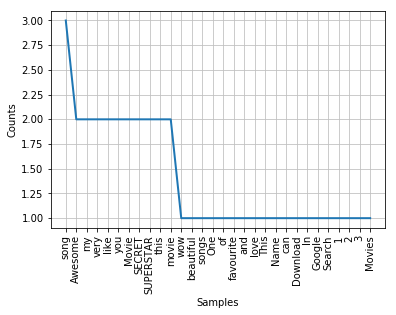

In [164]:
%matplotlib inline
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

### removing stopwords

In [165]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRATEEK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [166]:
filtered_words=[]
for words in removing_emojis:
    if words not in stop_words:
        filtered_words.append(words)

print("Filterd words:",filtered_words)
print(len(filtered_words))

Filterd words: ['Awesome', 'wow', 'beautiful', 'song', 'Awesome', 'songs', 'One', 'favourite', 'song', 'like', 'love', 'This', 'Movie', 'Name', 'SECRET', 'SUPERSTAR', 'Download', 'Movie', 'In', 'Google', 'Search', '1', '2', '3', 'Movies', 'And', 'search', 'SECRET', 'SUPERSTAR', 'nice', 'song', 'please', 'give', 'movie', 'Super', 'movie', 'Love', 'Indonesia', 'like', 'You', 'favorite', 'singer', 'Truly', 'talented']
44


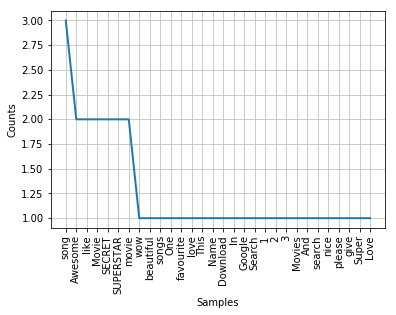

In [167]:
fdist = FreqDist(filtered_words)
fdist.plot(30,cumulative=False)
plt.show()

In [168]:
print(len(set(filtered_words)))
set(filtered_words)

36


{'1',
 '2',
 '3',
 'And',
 'Awesome',
 'Download',
 'Google',
 'In',
 'Indonesia',
 'Love',
 'Movie',
 'Movies',
 'Name',
 'One',
 'SECRET',
 'SUPERSTAR',
 'Search',
 'Super',
 'This',
 'Truly',
 'You',
 'beautiful',
 'favorite',
 'favourite',
 'give',
 'like',
 'love',
 'movie',
 'nice',
 'please',
 'search',
 'singer',
 'song',
 'songs',
 'talented',
 'wow'}

### Stemming v/s Lemmatization

### Stemming

In [169]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()

stemmed_words=[]
for word in filtered_words:
    stemmed_words.append(ps.stem(word))
    
print("Stemmed Words:",stemmed_words)

Stemmed Words: ['awesom', 'wow', 'beauti', 'song', 'awesom', 'song', 'one', 'favourit', 'song', 'like', 'love', 'thi', 'movi', 'name', 'secret', 'superstar', 'download', 'movi', 'In', 'googl', 'search', '1', '2', '3', 'movi', 'and', 'search', 'secret', 'superstar', 'nice', 'song', 'pleas', 'give', 'movi', 'super', 'movi', 'love', 'indonesia', 'like', 'you', 'favorit', 'singer', 'truli', 'talent']


### Lemmatization

In [170]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
lem = WordNetLemmatizer()

lemmatized_words = []
for word in filtered_words:
    lemmatized_words.append(lem.lemmatize(word,"v"))
    
print("Lemmatized Words:",lemmatized_words)

Lemmatized Words: ['Awesome', 'wow', 'beautiful', 'song', 'Awesome', 'songs', 'One', 'favourite', 'song', 'like', 'love', 'This', 'Movie', 'Name', 'SECRET', 'SUPERSTAR', 'Download', 'Movie', 'In', 'Google', 'Search', '1', '2', '3', 'Movies', 'And', 'search', 'SECRET', 'SUPERSTAR', 'nice', 'song', 'please', 'give', 'movie', 'Super', 'movie', 'Love', 'Indonesia', 'like', 'You', 'favorite', 'singer', 'Truly', 'talented']


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PRATEEK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### POS Tagging

In [171]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokenized_word)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PRATEEK\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Awesome', 'NNP'),
 ('wow', 'NN'),
 ('beautiful', 'NN'),
 ('song', 'NN'),
 ('Awesome', 'NNP'),
 ('songs👏👏👏👍', 'VBD'),
 ('One', 'CD'),
 ('of', 'IN'),
 ('my', 'PRP$'),
 ('favourite', 'NN'),
 ('song', 'NN'),
 ('😊😊😊😊', 'JJ'),
 ('very', 'RB'),
 ('very', 'RB'),
 ('like', 'IN'),
 ('and', 'CC'),
 ('love', 'VB'),
 ('you', 'PRP'),
 ('This', 'DT'),
 ('Movie', 'NNP'),
 ('Name', 'NNP'),
 ('“', 'NNP'),
 ('SECRET', 'NNP'),
 ('SUPERSTAR', 'NNP'),
 ('”', 'NNP'),
 ('you', 'PRP'),
 ('can', 'MD'),
 ('Download', 'VB'),
 ('this', 'DT'),
 ('Movie', 'NNP'),
 ('In', 'IN'),
 ('Google', 'NNP'),
 ('Search', 'NNP'),
 ('1,2,3', 'CD'),
 ('Movies', 'NNS'),
 ('And', 'CC'),
 ('search', 'VBP'),
 ('the', 'DT'),
 ('SECRET', 'NNP'),
 ('SUPERSTAR😊', 'NNP'),
 ('nice', 'NN'),
 ('song', 'NN'),
 ('please', 'NN'),
 ('give', 'VB'),
 ('me', 'PRP'),
 ('this', 'DT'),
 ('movie', 'NN'),
 ('Super', 'NNP'),
 ('movie', 'NN'),
 ('!', '.'),
 ('Love', 'VB'),
 ('from', 'IN'),
 ('Indonesia', 'NNP'),
 ('💜', 'NNP'),
 ('i', 'NN'),
 ('like😍', '

## Sentiment Analysis using Machine learning

## Multi-Nomial Naive Bayes Classification 

### 0 - negative 1 - somewhat negative 2 - neutral 3 - somewhat positive 4 - positive

In [172]:
data=pd.read_csv('train.tsv', sep='\t')

In [173]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [175]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [176]:
Sentiment_count=data.groupby('Sentiment').count()
Sentiment_count

,PhraseId,SentenceId,Phrase
Sentiment,,,
0,7072,7072,7072
1,27273,27273,27273
2,79582,79582,79582
3,32927,32927,32927
4,9206,9206,9206


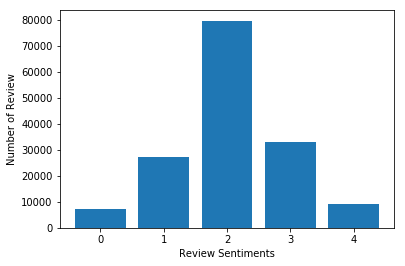

In [177]:
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [178]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

In [179]:
import numpy as np
text_counts= cv.fit_transform(data['Phrase'])

print(text_counts.shape)

(156060, 14988)


In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

In [181]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6049169122986885


In [182]:
type(data['Phrase'])

pandas.core.series.Series

In [183]:
type(lemmatized_words)
df = pd.Series(lemmatized_words)
print(df)

0       Awesome
1           wow
2     beautiful
3          song
4       Awesome
5         songs
6           One
7     favourite
8          song
9          like
10         love
11         This
12        Movie
13         Name
14       SECRET
15    SUPERSTAR
16     Download
17        Movie
18           In
19       Google
20       Search
21            1
22            2
23            3
24       Movies
25          And
26       search
27       SECRET
28    SUPERSTAR
29         nice
30         song
31       please
32         give
33        movie
34        Super
35        movie
36         Love
37    Indonesia
38         like
39          You
40     favorite
41       singer
42        Truly
43     talented
dtype: object


In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])
print(text_tf.shape)
print(text_tf)

(156060, 15240)
  (0, 11837)	0.1761994204821687
  (0, 9227)	0.27061683772839323
  (0, 4577)	0.278538658922562
  (0, 3490)	0.2485059095620638
  (0, 13505)	0.17690005957760713
  (0, 288)	0.251134096800077
  (0, 13503)	0.08982508036989033
  (0, 14871)	0.1354415412970302
  (0, 7217)	0.17522921677393963
  (0, 5821)	0.2625302862532789
  (0, 5323)	0.20344769269023563
  (0, 5837)	0.22883807138484064
  (0, 529)	0.1614381914318891
  (0, 5595)	0.265796263188737
  (0, 12424)	0.1381592967010513
  (0, 14888)	0.28701927784529135
  (0, 9204)	0.19301332592202286
  (0, 602)	0.26341877863818697
  (0, 1879)	0.11034437734762885
  (0, 9085)	0.1898515417082945
  (0, 593)	0.22068902883834374
  (0, 13681)	0.07615285026452821
  (0, 8807)	0.1353879543646446
  (0, 12857)	0.12785637560254456
  (1, 11837)	0.29125926935214375
  :	:
  (156050, 625)	0.2115725833396903
  (156050, 11465)	0.670263619653983
  (156050, 9193)	0.6864890126115724
  (156051, 625)	0.21534359576868978
  (156051, 11465)	0.6822102168950972
  (1560

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=123)

In [186]:
print(X_test.shape)
print(type(X_test))

(46818, 15240)
<class 'scipy.sparse.csr.csr_matrix'>


In [187]:
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print(predicted)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

[3 2 2 ... 2 2 2]
MultinomialNB Accuracy: 0.5865265496176684


In [188]:
import scipy
text_counts_reviews = tf.transform(df)
print(text_counts_reviews.shape)
#print(type(text_counts_reviews))

#print(text_counts_reviews)
#scipy.sparse.csr_matrix(text_counts_reviews.values)

predicted_reviews = clf.predict(text_counts_reviews)
predicted_reviews

(44, 15240)


array([4, 3, 3, 2, 4, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3],
      dtype=int64)